In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
!pip install s3fs

In [71]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.106
    Uninstalling botocore-1.34.106:
      Successfully uninstalled botocore-1.34.106
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.13.0 requires botocore<1.34.107,>=1.34.70, but you have botocore 1.34.121 which is incompatible.


In [2]:
df=pd.read_csv("s3://gba6430-huayang-01/intro/lung_cancer_data.csv")
df

,Unnamed: 0,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
1,2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
2,3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
3,4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
4,5,6,50.0,Male,Finland,2023-01-04,Stage II,2023-01-12,Yes,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,61.0,Female,Portugal,2015-10-02,Stage I,2015-10-08,No,Passive Smoker,24.9,233,1,1,0,0,Chemotherapy,2016-12-04,0
9996,9997,9998,52.0,Female,Croatia,2022-11-12,Stage I,2022-11-30,No,Current Smoker,16.5,153,1,0,0,0,Radiation,2024-08-01,1
9997,9998,9999,69.0,Male,Estonia,2021-03-25,Stage III,2021-03-28,Yes,Never Smoked,20.5,187,0,0,0,0,Radiation,2022-10-29,1
9998,9999,10000,70.0,Male,Netherlands,2022-02-11,Stage II,2022-02-27,No,Former Smoker,23.2,188,1,1,1,0,Radiation,2023-07-01,0


In [3]:
df.isnull().sum()

Unnamed: 0                     0
id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'country', 'diagnosis_date',
       'cancer_stage', 'beginning_of_treatment_date', 'family_history',
       'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date',
       'survived'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5001.50000,54.767300,30.516040,233.29950,0.752000,0.468600,0.219900,0.086500,0.215300
std,2886.89568,2886.89568,10.032378,8.369464,43.79629,0.431873,0.499038,0.414199,0.281115,0.411051
min,1.00000,2.00000,18.000000,16.000000,150.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2501.75000,48.000000,23.300000,195.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,5001.50000,55.000000,30.500000,242.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7500.25000,7501.25000,62.000000,37.700000,271.00000,1.000000,1.000000,0.000000,0.000000,0.000000
max,10000.00000,10001.00000,93.000000,45.000000,300.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
genderCount=df['gender'].value_counts()
genderCount

gender
Female    5035
Male      4965
Name: count, dtype: int64

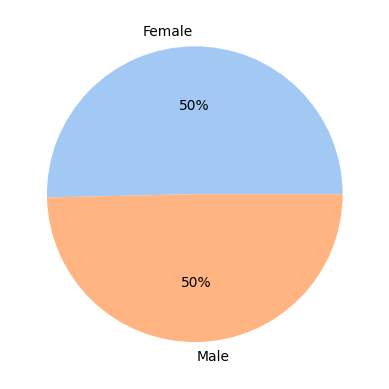

In [7]:
pie_color=sns.color_palette('pastel')
plt.pie(genderCount,labels=genderCount.index,colors=pie_color,autopct='%.0f%%')
plt.show()

In [8]:
smokingstatusC=df['smoking_status'].value_counts()
smokingstatusC

smoking_status
Passive Smoker    2538
Former Smoker     2499
Current Smoker    2483
Never Smoked      2480
Name: count, dtype: int64

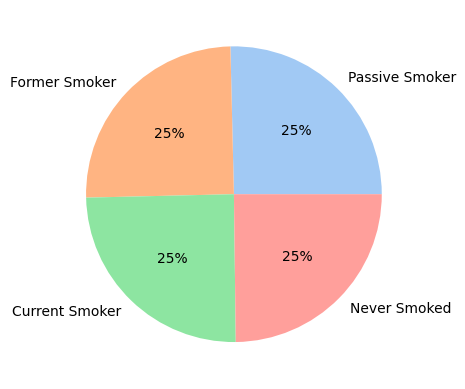

In [9]:
pie_color=sns.color_palette('pastel')
plt.pie(smokingstatusC,labels=smokingstatusC.index,colors=pie_color,autopct='%.0f%%')
plt.show()

In [10]:
treatmenttypeC=df['treatment_type'].value_counts()
treatmenttypeC

treatment_type
Radiation       2552
Chemotherapy    2516
Surgery         2502
Combined        2430
Name: count, dtype: int64

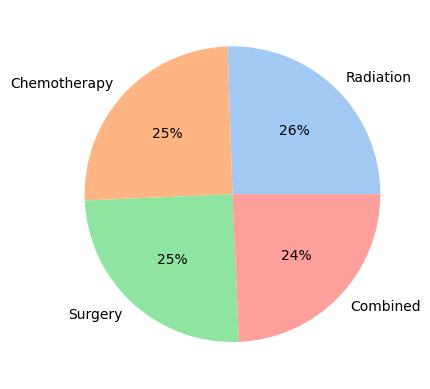

In [11]:
pie_color=sns.color_palette('pastel')
plt.pie(treatmenttypeC,labels=treatmenttypeC.index,colors=pie_color,autopct='%.0f%%')
plt.show()

In [12]:
countryC=df['country'].value_counts()
countryC

country
Netherlands       435
Malta             403
Sweden            398
Bulgaria          394
Denmark           389
Poland            388
Estonia           386
Romania           384
Belgium           379
Finland           374
Germany           371
Croatia           370
Austria           364
Luxembourg        364
Portugal          363
Hungary           363
Italy             363
Lithuania         362
Czech Republic    358
Slovenia          357
Latvia            355
Ireland           352
Spain             352
Cyprus            351
Greece            346
Slovakia          345
France            334
Name: count, dtype: int64

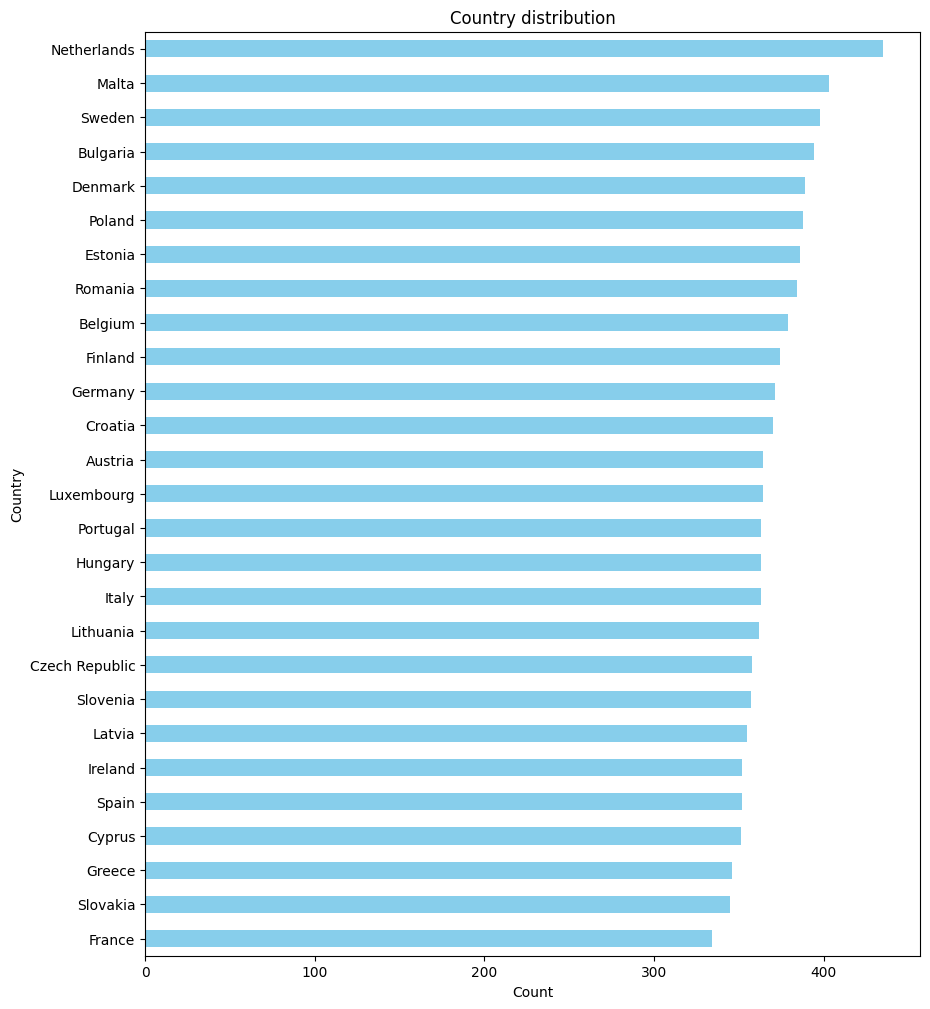

In [13]:
plt.figure(figsize=(10, 12))
countryC.plot(kind='barh', color='skyblue')

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Country distribution')
plt.gca().invert_yaxis()

plt.show()

In [14]:
total_datasets = countryC.sum()
total_datasets

10000

In [15]:
df['family_history'] = df['family_history'].replace({'Yes': 1, 'No': 0})
df

,Unnamed: 0,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,1,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
1,2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,0,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
2,3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,1,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
3,4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,1,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
4,5,6,50.0,Male,Finland,2023-01-04,Stage II,2023-01-12,1,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,61.0,Female,Portugal,2015-10-02,Stage I,2015-10-08,0,Passive Smoker,24.9,233,1,1,0,0,Chemotherapy,2016-12-04,0
9996,9997,9998,52.0,Female,Croatia,2022-11-12,Stage I,2022-11-30,0,Current Smoker,16.5,153,1,0,0,0,Radiation,2024-08-01,1
9997,9998,9999,69.0,Male,Estonia,2021-03-25,Stage III,2021-03-28,1,Never Smoked,20.5,187,0,0,0,0,Radiation,2022-10-29,1
9998,9999,10000,70.0,Male,Netherlands,2022-02-11,Stage II,2022-02-27,0,Former Smoker,23.2,188,1,1,1,0,Radiation,2023-07-01,0


In [16]:
unique_values = df['cancer_stage'].unique()
unique_values

array(['Stage III', 'Stage IV', 'Stage I', 'Stage II'], dtype=object)

In [17]:
stage_mapping = {
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3,
    'Stage IV': 4
}

df['cancer_stage'] = df['cancer_stage'].replace(stage_mapping)
df

,Unnamed: 0,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,2,50.0,Male,Czech Republic,2023-04-22,3,2023-05-02,1,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
1,2,3,65.0,Male,Romania,2023-04-07,4,2023-04-12,0,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
2,3,4,51.0,Female,Latvia,2016-02-07,3,2016-02-13,1,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
3,4,5,37.0,Male,Greece,2023-12-01,1,2023-12-03,1,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
4,5,6,50.0,Male,Finland,2023-01-04,2,2023-01-12,1,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,61.0,Female,Portugal,2015-10-02,1,2015-10-08,0,Passive Smoker,24.9,233,1,1,0,0,Chemotherapy,2016-12-04,0
9996,9997,9998,52.0,Female,Croatia,2022-11-12,1,2022-11-30,0,Current Smoker,16.5,153,1,0,0,0,Radiation,2024-08-01,1
9997,9998,9999,69.0,Male,Estonia,2021-03-25,3,2021-03-28,1,Never Smoked,20.5,187,0,0,0,0,Radiation,2022-10-29,1
9998,9999,10000,70.0,Male,Netherlands,2022-02-11,2,2022-02-27,0,Former Smoker,23.2,188,1,1,1,0,Radiation,2023-07-01,0
